In [1]:
import os
import geopandas as gpd
import time
import requests
data_pkg_path = 'Mormugao Wells'
filename = 'Wells.shp'
path = os.path.join(data_pkg_path, filename)
wells_gdf = gpd.read_file(path)
wells_gdf


,Sr No,Reg.No.,Name & Add,Type Of We,Location o,Purpose Fo,Latitude,Longitude,geometry
0,1,13,"HENRIQUES FREDRICK ONASSIS, H.No.148, Opp. LML...",Open Well,C-128 P.T.S-130,Domestic,15.391205,73.819121,POINT (73.81912 15.39120)
1,2,162,"M/s. Daffodil Hotels Pvt. Ltd.,F-2, Landscape ...",Open Well,136/1,Horticulture,15.335937,73.896042,POINT (73.89604 15.33594)
2,3,178,"VARAMA AGENCIES, Plot no.19 to 22 and 37 to 40...",Bore Well,185/Plot no.19 to 22 and 37 to 40,Industry,15.386075,73.878684,POINT (73.87868 15.38607)
3,4,217,"AMBARAM NAVANEETHAN , H.No.124/A, Opp. Gomete...",Bore Well,Survey No. 20/176,Commercial,15.385044,73.813632,POINT (73.81363 15.38504)
4,5,208,VARAMA SIR INDIA LOGISTIC AND INFRASTRUCTURE P...,Bore Well,203/1,Industry,15.375485,73.905688,POINT (73.90569 15.37548)
...,...,...,...,...,...,...,...,...,...
227,228,180/Mor,"Shri. Prasad Hanagi, Hno558/14(19), Dhumea Bha...",Bore Well,71/2,Domestic,15.394438,73.919233,POINT (73.91923 15.39444)
228,229,181/Mor,"M/S Gemini Distilleries, Sancoale Industrial E...",Bore Well,Plot no 11 to 15 and 21 to 24,Industry,15.384525,73.871136,POINT (73.87114 15.38453)
229,230,182/Mor,"Shri. Purushottam Ramrakhyani, C-1, Taxila Apa...",Bore Well,23/1,Construction,15.398820,73.854238,POINT (73.85424 15.39882)
230,231,183/Mor,"Shri. Davinder Singh, A257, New Friends Colony...",Bore Well,61/1-E,Construction,15.384247,73.853700,POINT (73.85370 15.38425)


In [2]:
import json
import time
ors_api_key = '5b3ce3597851110001cf624895e4adacfa5e47ebab8e735f23fe4306'

def get_elevation(row):
    x_coord = row['Longitude']
    y_coord = row['Latitude']
    body = {'format_in':'point','geometry':[x_coord, y_coord]}

    headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': ors_api_key,
    'Content-Type': 'application/json; charset=utf-8'
    }
    response = requests.post('https://api.openrouteservice.org/elevation/point', json=body, headers=headers)
    time.sleep(3)
    if response.status_code == 200:
        result = response.json()
        coordinates = result['geometry']['coordinates']
        z = coordinates[2]
        return z
        
    else:
        print('Request failed.')

In [3]:
wells_gdf['elevation'] = wells_gdf.apply(get_elevation, axis = 1)

In [5]:
wells_gdf

,Sr No,Reg.No.,Name & Add,Type Of We,Location o,Purpose Fo,Latitude,Longitude,geometry,elevation
0,1,13,"HENRIQUES FREDRICK ONASSIS, H.No.148, Opp. LML...",Open Well,C-128 P.T.S-130,Domestic,15.391205,73.819121,POINT (73.81912 15.39120),14
1,2,162,"M/s. Daffodil Hotels Pvt. Ltd.,F-2, Landscape ...",Open Well,136/1,Horticulture,15.335937,73.896042,POINT (73.89604 15.33594),10
2,3,178,"VARAMA AGENCIES, Plot no.19 to 22 and 37 to 40...",Bore Well,185/Plot no.19 to 22 and 37 to 40,Industry,15.386075,73.878684,POINT (73.87868 15.38607),91
3,4,217,"AMBARAM NAVANEETHAN , H.No.124/A, Opp. Gomete...",Bore Well,Survey No. 20/176,Commercial,15.385044,73.813632,POINT (73.81363 15.38504),13
4,5,208,VARAMA SIR INDIA LOGISTIC AND INFRASTRUCTURE P...,Bore Well,203/1,Industry,15.375485,73.905688,POINT (73.90569 15.37548),68
...,...,...,...,...,...,...,...,...,...,...
227,228,180/Mor,"Shri. Prasad Hanagi, Hno558/14(19), Dhumea Bha...",Bore Well,71/2,Domestic,15.394438,73.919233,POINT (73.91923 15.39444),39
228,229,181/Mor,"M/S Gemini Distilleries, Sancoale Industrial E...",Bore Well,Plot no 11 to 15 and 21 to 24,Industry,15.384525,73.871136,POINT (73.87114 15.38453),79
229,230,182/Mor,"Shri. Purushottam Ramrakhyani, C-1, Taxila Apa...",Bore Well,23/1,Construction,15.398820,73.854238,POINT (73.85424 15.39882),60
230,231,183/Mor,"Shri. Davinder Singh, A257, New Friends Colony...",Bore Well,61/1-E,Construction,15.384247,73.853700,POINT (73.85370 15.38425),51


In [12]:
output_filename = 'wells_elevation.csv'
output_dir = 'wells_elevation'
output_path = os.path.join(output_dir, output_filename)
wells_gdf.to_csv(output_path)
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at wells_elevation\wells_elevation.csv


In [13]:
import matplotlib as plt

Text(0.5, 102.24449369097458, 'Longitude')

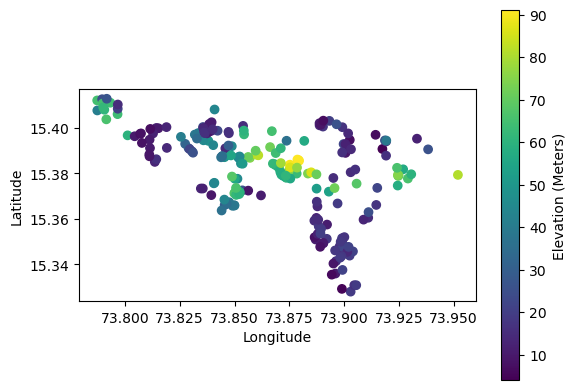

In [27]:
ax = wells_gdf.plot('elevation',legend=True,legend_kwds={'label': 'Elevation (Meters)'})
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#got this on the internet, ive understood it to some extent but ive copied it from some other code. ill go through the visualisation documentation and improve upon the plot, also try folium for future projects.
